In [1]:
#file= '2022090800_AET.nc'
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
from mpl_toolkits.basemap import Basemap

In [2]:
ds=nc.Dataset('2022090800_Day.nc')
print(ds.variables.keys())

lat= ds.variables['latitude'][:]
lon= ds.variables['longitude'][:]
data=ds.variables['PRES_surface'][0]
print(data)

lon0,lat0=np.meshgrid(lon,lat)
print(lat.shape,lon.shape,data.shape)
print(data.min())
print(data.max())

dict_keys(['latitude', 'longitude', 'time', 'PRES_surface', 'TMP_2maboveground', 'DPT_2maboveground', 'RH_2maboveground', 'UGRD_10maboveground', 'VGRD_10maboveground', 'APCP_surface'])
[[101196.33  101194.73  101194.73  ... 101237.93  101237.93  101239.52 ]
 [101194.73  101196.33  101197.93  ... 101242.73  101239.52  101239.52 ]
 [101194.73  101196.33  101197.93  ... 101249.125 101245.93  101239.52 ]
 ...
 [102217.125 102233.125 102239.52  ...  87761.125  87650.73   87545.125]
 [102220.33  102234.73  102237.93  ...  87772.33   87692.33   87594.73 ]
 [102221.93  102217.125 102210.73  ...  87797.93   87740.33   87652.33 ]]
(1850,) (1950,) (1850, 1950)
44413.92
102239.52


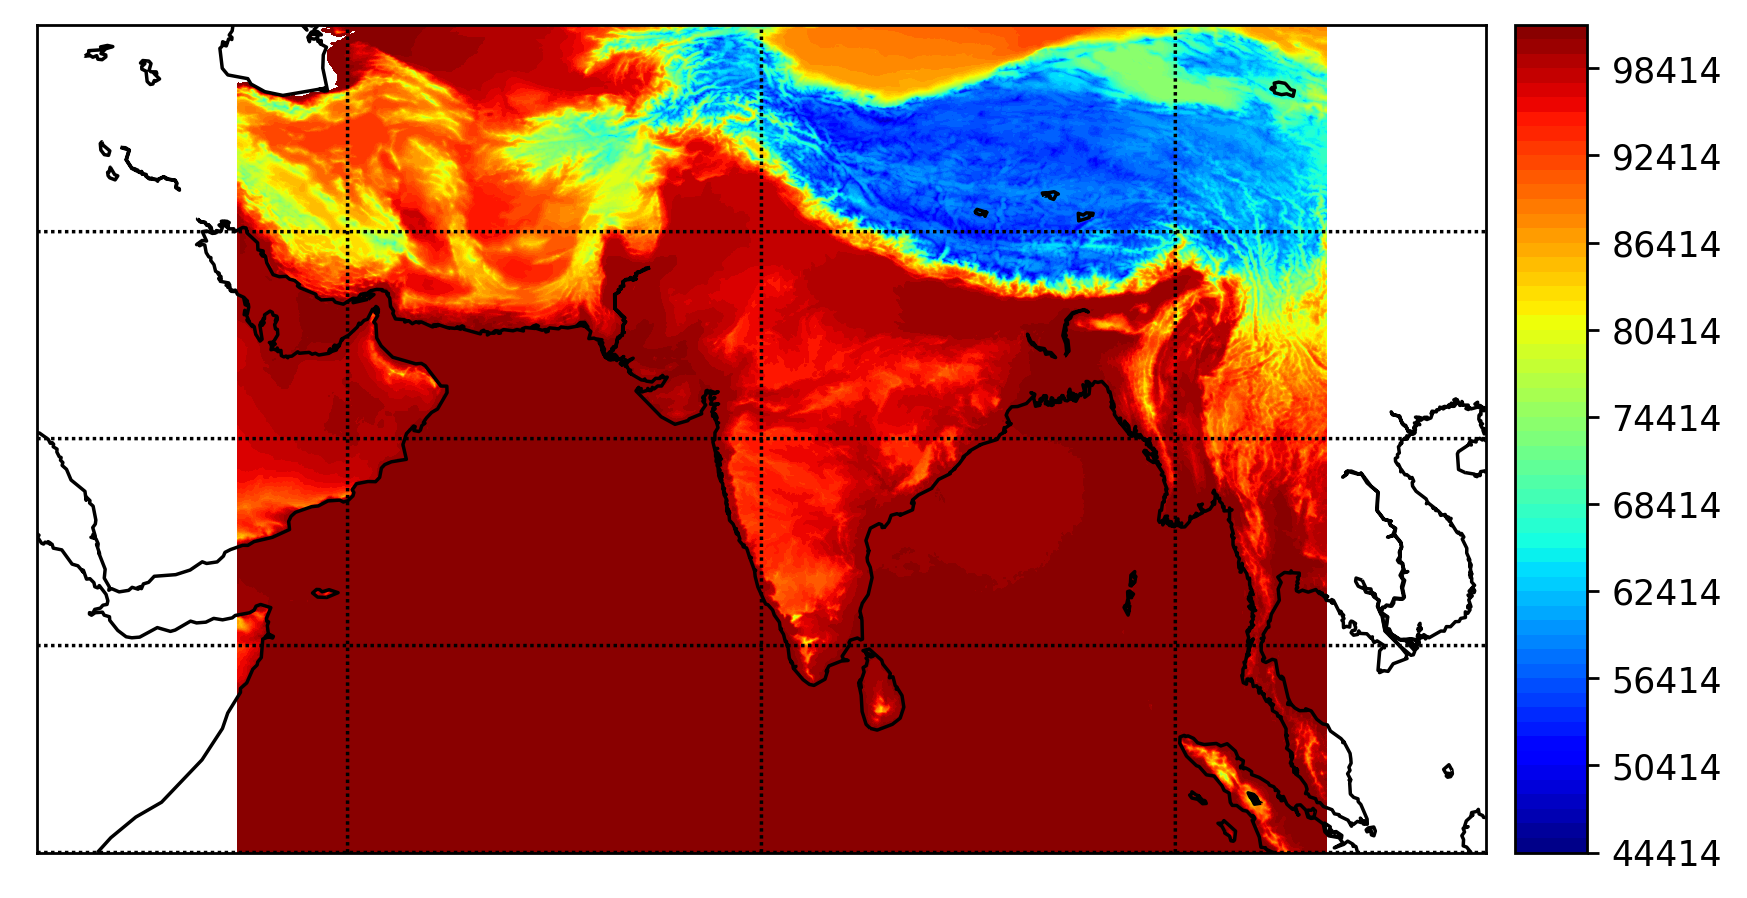

In [4]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
clev=np.arange(data.min(),data.max(),1000)
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)
p=m.contourf(lon0,lat0,data,clev,cmap='jet')
cbar=m.colorbar(p,location='right')
plt.show()